# 

# Intro à Scikit-Learn

From:

* [VanderPlas, Jake. 2017. Python Data Science Handbook. O’Reilly Media, Inc.](https://github.com/jakevdp/PythonDataScienceHandbook)
* [Scikit-Learn datasets: The Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

## Classification

### Chargement des données

https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset

In [1]:
import platform

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from matplotlib.colors import ListedColormap

In [2]:
if platform.system() == "Darwin":
    %config InlineBackend.figure_format="retina"  # For high DPI display

print(sklearn.__version__)  # 1.2.2

1.2.2


In [3]:
from sklearn import datasets

iris = datasets.load_iris()

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
features_2d = iris.feature_names[:2]
print(features_2d)

xs_2d = df.loc[:, features_2d].values

ys = iris.target

['sepal length (cm)', 'sepal width (cm)']


In [7]:
print(xs_2d.shape, ys.shape)

(150, 2) (150,)


Disposition attendue des descripteurs (*features*) et des valeurs cibles (*labels*):

![](img/05.02-samples-features.png)

### Entrainement des modèles

In [8]:
from sklearn.model_selection import train_test_split

train_xs, test_xs, train_ys, test_ys = train_test_split(
    xs_2d, ys, random_state=1
)
print(train_xs.shape, test_xs.shape)

(112, 2) (38, 2)


In [9]:
# 1. Choix du modèle (classe)
from sklearn.naive_bayes import GaussianNB

# 2. Instantiaiton : Gaussian Naïve based (modèle simple et sans paramètre)
model = GaussianNB()

# 3. Apprentissage (fit) du model
model.fit(train_xs, train_ys)

# 4. Prédire sur les données de test
pred_ys = model.predict(test_xs)

### Évaluation

Exactitude (Taux de bonne classification, [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision))

https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers#Single_metrics

$$\mathrm{ACC} 
= \frac{\mathrm{TP} + \mathrm{TN}}{\mathrm{P} + \mathrm {N}}
= \frac{\mathrm{TP} + \mathrm{TN}}
    {\mathrm{TP} + \mathrm{TN} + \mathrm {FP} +\mathrm {FN}}$$

In [10]:
from sklearn.metrics import accuracy_score

score = accuracy_score(test_ys, pred_ys)
print(f"{score :.04f}")

0.8158


### Graphiques

In [11]:
def plot_decision_boundary(xs, model, colors=None):
    try:
        cmap = ListedColormap(colors.values())
    except AttributeError:
        cmap = None

    # Prepare the data to plot the decision boundary
    # Need to assign a color to each point in the mesh
    # [x1_min, x1_max] x [x2_min, x2_max]

    x_min, x_max = xs[:, 0].min() - 1, xs[:, 0].max() + 1
    y_min, y_max = xs[:, 1].min() - 1, xs[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, num=600), np.linspace(y_min, y_max, num=600)
    )

    zz = model.predict(np.c_[xx.ravel(), yy.ravel()])
    zz = zz.reshape(xx.shape)
    # print(zz.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(
        xx,
        yy,
        zz,
        alpha=0.4,
        cmap=cmap,
        antialiased=True,
    )

In [12]:
def plot_training_points(xs, ys, ft_names=None, target_names=None, colors=None):
    if target_names is None:
        target_names = {}
    if colors is None:
        colors = {}

    for y_val in set(ys):
        plt.scatter(
            xs[ys == y_val, 0],
            xs[ys == y_val, 1],
            color=colors.get(y_val),
            alpha=0.8,
            label=target_names.get(y_val),
            edgecolor="black",
        )
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.title("3-Class classification")
    try:
        plt.xlabel(ft_names[0])
        plt.ylabel(ft_names[1])
    except TypeError:
        pass

In [13]:
COLORS = {0: "green", 1: "red", 2: "blue"}

target_names = {k: v for k, v in enumerate(iris.target_names)}

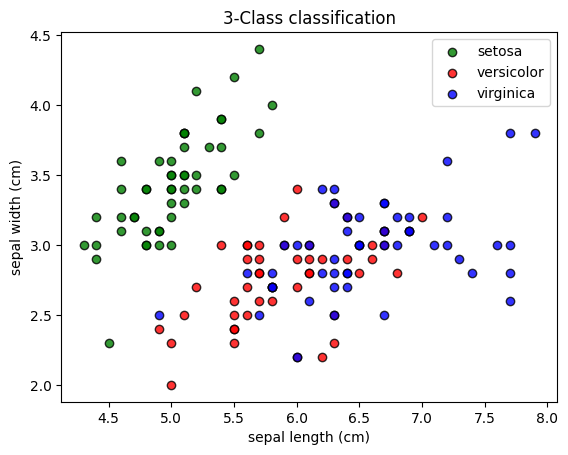

In [14]:
plot_training_points(xs_2d, ys, features_2d, target_names, COLORS)

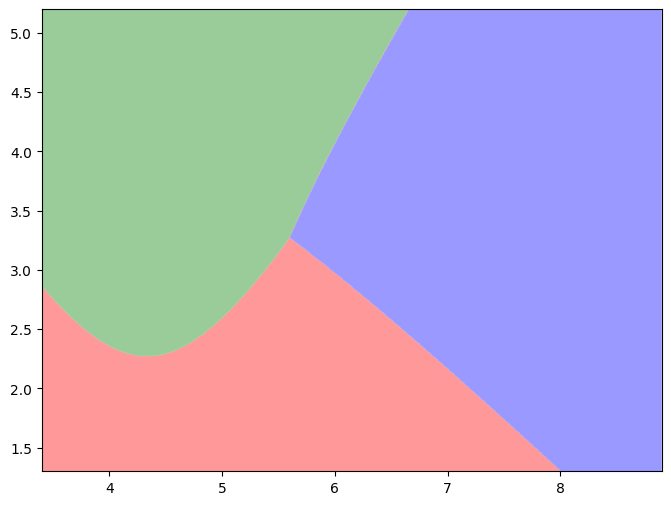

In [15]:
plot_decision_boundary(test_xs, model, COLORS)

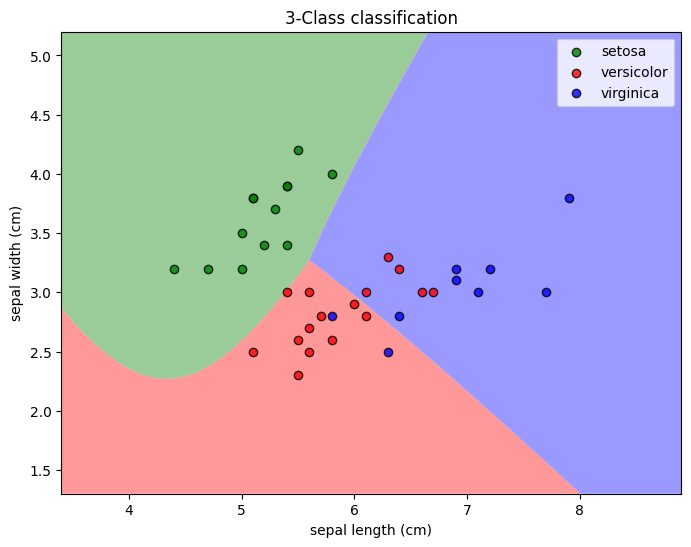

In [16]:
plot_decision_boundary(test_xs, model, COLORS)
plot_training_points(test_xs, test_ys, features_2d, target_names, COLORS)

## Exercice 1

Chercher dans la [documentation](https://scikit-learn.org/stable/supervised_learning.html) comment appliquer à ce dataset les autres modèles cités au cours :

* Régression logistique (*[Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)*)
* Arbre de décision (*[Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)*)
* Forêt d'arbres décisionnels (*[Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)*)
* k plus proches voisins (*[k-Nearest Neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)*)
* Machine à vecteurs de support (*[Support Vector Machines, SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)*)

Indiquez les résultats dans un tableau et graphiquement pour chaque système à l'aide des fonctions `plot_...` [ci-dessus](#Graphiques).

Notez les résultats dans un tableau et donnez une courte analyse en comparant les résultats.

<span style="color:red">Implémentez votre solution ci-dessous</span>

### Instaciations et Training + Tableau

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# 1. Instanciation
log_model = LogisticRegression()
tree_model = DecisionTreeClassifier()
forest_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()
svm_model = SVC()

# 2. Apprentissage
log_model.fit(train_xs, train_ys)
tree_model.fit(train_xs, train_ys)
forest_model.fit(train_xs, train_ys)
knn_model.fit(train_xs, train_ys)
svm_model.fit(train_xs, train_ys)

# 3. Prédiction
log_pred = log_model.predict(test_xs)
tree_pred = tree_model.predict(test_xs)
forest_pred = forest_model.predict(test_xs)
knn_pred = knn_model.predict(test_xs)
svm_pred = svm_model.predict(test_xs)


# 4. Evaluation
log_score = accuracy_score(test_ys, log_pred)
tree_score = accuracy_score(test_ys, tree_pred)
forest_score = accuracy_score(test_ys, forest_pred)
knn_score = accuracy_score(test_ys, knn_pred)
svm_score = accuracy_score(test_ys, svm_pred)
model_scores = accuracy_score(test_ys, pred_ys)
{"Log" : log_score, "Tree" : tree_score, "Forest" : forest_score, "KNN" : knn_score, "SVM" : svm_score, "Naive Bayes" : model_scores}
# Ranking : KNN > SVM = Naive Bayes > Forest = Log > Tree 
# So KNN explains the most the data for this problem apparently, the equality between SVM and Naive Bayes is due to the fact that the data is linearly separable

{'Log': 0.7894736842105263,
 'Tree': 0.631578947368421,
 'Forest': 0.7631578947368421,
 'KNN': 0.8421052631578947,
 'SVM': 0.8157894736842105,
 'Naive Bayes': 0.8157894736842105}

### Log-model plot

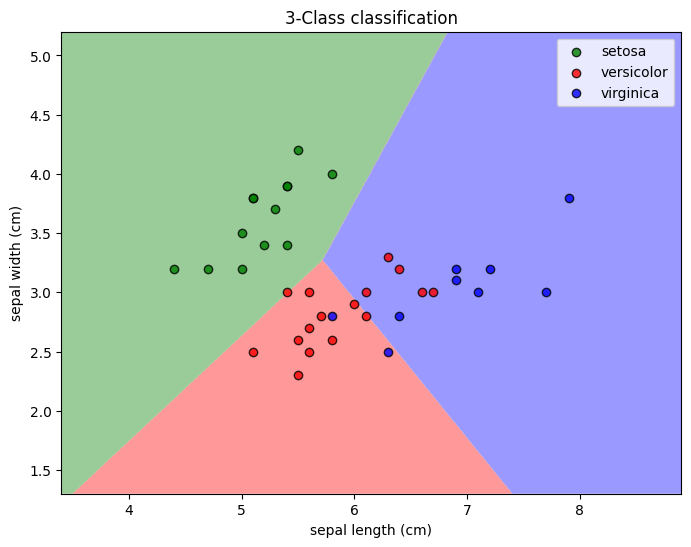

In [18]:
plot_decision_boundary(test_xs, log_model, COLORS)
plot_training_points(test_xs, test_ys, features_2d, target_names, COLORS)

### Tree-model plot

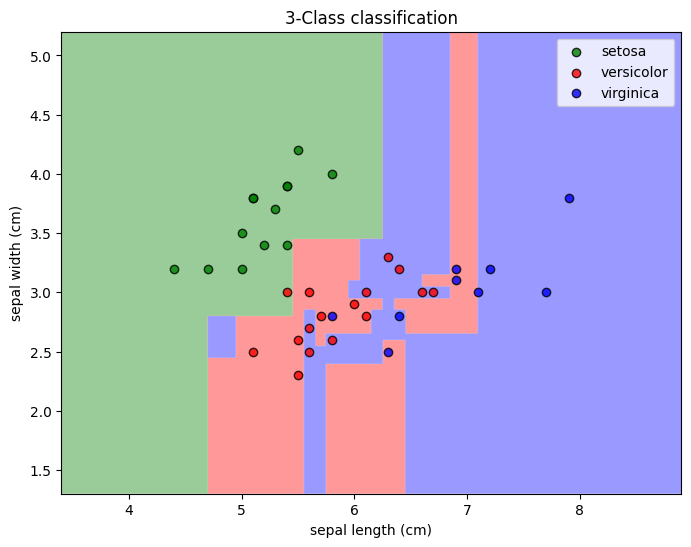

In [19]:
plot_decision_boundary(test_xs, tree_model, COLORS)
plot_training_points(test_xs, test_ys, features_2d, target_names, COLORS)

### Forest-model plot

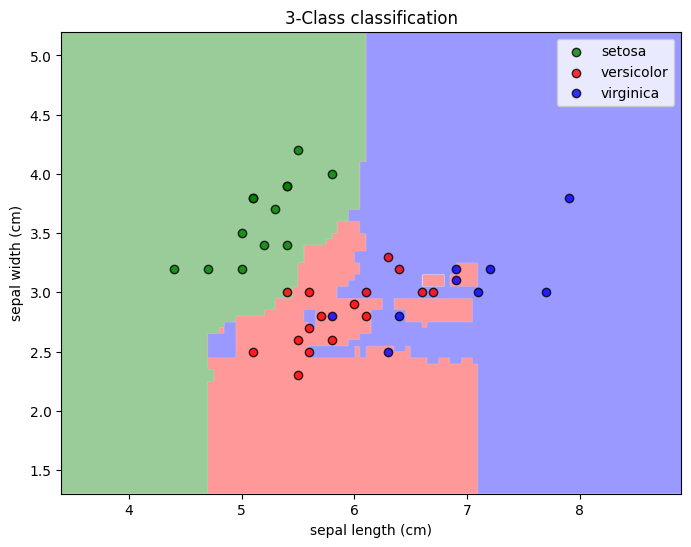

In [20]:
plot_decision_boundary(test_xs, forest_model, COLORS)
plot_training_points(test_xs, test_ys, features_2d, target_names, COLORS)

### KNN-model plot

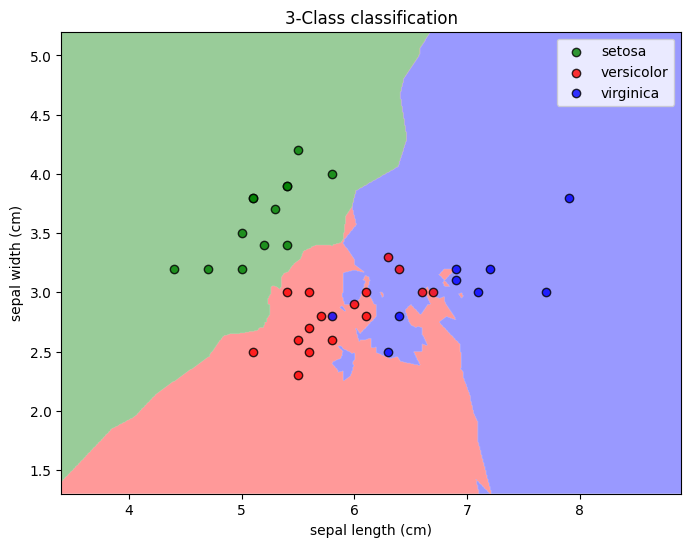

In [21]:
plot_decision_boundary(test_xs, knn_model, COLORS)
plot_training_points(test_xs, test_ys, features_2d, target_names, COLORS)

### SVM-model plot

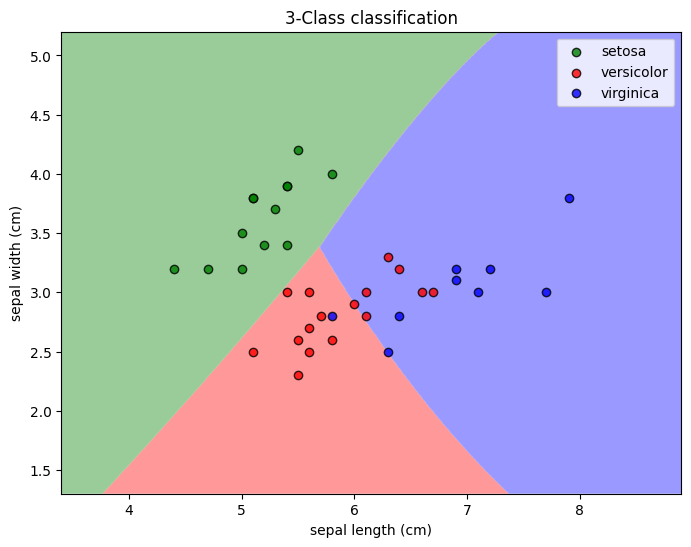

In [22]:
plot_decision_boundary(test_xs, svm_model, COLORS)
plot_training_points(test_xs, test_ys, features_2d, target_names, COLORS)

## Exercice 2

* Appliquez une [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) à tous les descripteurs (il y en a 4) du dataset Iris

* Donnez le pourcentage de variance expliqué par chacune des composantes sélectionnées (`explained_variance_ratio_`), ainsi que leur somme cumulée (`cumsum`)

* Appliquez l'un des classifieurs précédents aux deux premières composantes principales

* Comparez la qualité des prédictions entre celles obtenues avec les deux premières composantes principales et celles obtenues avec les 2 premiers descripteurs (Exercice 1)

---

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(iris.data)
X = pca.transform(iris.data)
pca.explained_variance_ratio_
pca.explained_variance_ratio_.cumsum()


array([0.92461872, 0.97768521, 0.99478782])

In [24]:



train_xs = pca.transform(train_xs)
train_ys = pca.transform(train_ys)
svm_model.fit(train_xs, train_ys)
test_xs = pca.transform(test_xs)
test_ys = pca.transform(test_ys)
pca_predi = svm_model.predict(test_xs)

plot_decision_boundary(test_xs, svm_model, COLORS)
plot_training_points(test_xs, test_ys, features_2d, target_names, COLORS)
accuracy_score(test_xs, pca_predi)
model_score


ValueError: X has 2 features, but PCA is expecting 4 features as input.